In [1]:
experience: dict = dict(
    C=[
        ((1, 2017), (1, 2018)),
        ((8, 2019), (11, 2019)),
        ((3, 2024), (4, 2024))
    ],
    
    CPP=[
        ((10, 2017), (11, 2017)),
        ((10, 2019), (6, 2020)),
        ((3, 2024), (4, 2024))
    ],

    Ruby=[
        ((1, 2019), (10, 2019))
    ],

    EmberJS=[
        ((1, 2019), (10, 2019))
    ],

    Godot=[
        ((10, 2019), (12, 2020)),
        ((8, 2023), (10, 2023))
    ],

    Python3=[
        ((9, 2017), (12, 2018)),
        ((6, 2020), (7, 2020)),
        ((12, 2020), (4, 2024))
    ],
    
    Redux=[
        ((1, 2021), (2, 2024))
    ],
    
    React=[
        ((12, 2020), (2, 2024))
    ],

    AWS=[
        ((8, 2018), (11, 2018)),
        ((5, 2020), (6, 2020)),
        ((1, 2021), (2, 2024))
    ],

    MySQL=[
        ((1, 2021), (2, 2024))
    ],

    SQLAlchemy=[
        ((1, 2021), (2, 2024))
    ],

    Elasticsearch=[
        ((6, 2021), (12, 2023))
    ],
)

BEGINNING_OF_HISTORY: int = 2000
NUM_MONTHS_IN_YEAR: int = 12


def diff_month(begin_date: tuple, end_date: tuple) -> int:
    month1, year1 = begin_date
    month2, year2 = end_date

    assert (isinstance(month1, int))
    assert (isinstance(month2, int))
    assert (isinstance(year1, int))
    assert (isinstance(year2, int))

    assert (0 < month1 <= NUM_MONTHS_IN_YEAR)
    assert (0 < month2 <= NUM_MONTHS_IN_YEAR)

    return (abs(year1 - year2) * NUM_MONTHS_IN_YEAR) + abs(month1 - month2)

def sum_months(date: tuple) -> int:
    month, year = date

    assert (isinstance(month, int))
    assert (isinstance(year, int))

    assert (0 < month <= NUM_MONTHS_IN_YEAR)

    return (abs(year - BEGINNING_OF_HISTORY) * NUM_MONTHS_IN_YEAR) + month


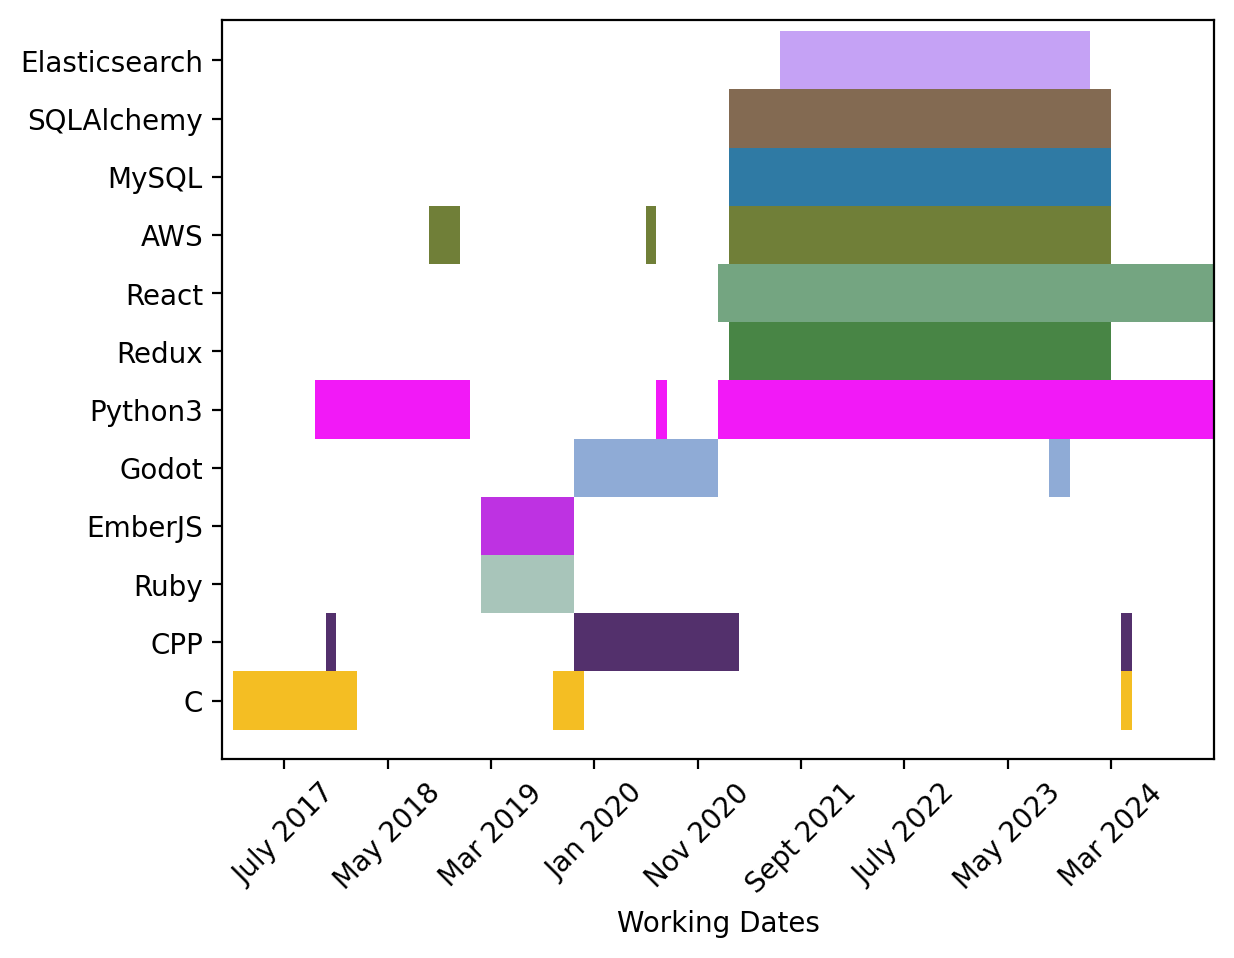

In [5]:
import random
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()

skills: list = list(experience.keys())
start_year: int = 2017 - BEGINNING_OF_HISTORY # Scale down to this century
end_year: int = 2025 - BEGINNING_OF_HISTORY # ...

start_year_months: int = start_year * NUM_MONTHS_IN_YEAR # Total months in those years for more scaling
end_year_months: int = end_year * NUM_MONTHS_IN_YEAR

month_range: list = [month
    for month in range(start_year_months, end_year_months)
    if (month % 10) == 0 # We only need every N months or so
]

index: int = 0

for skill, practice_dates in experience.items():
    data_row: list = []
    
    for date_ranges in practice_dates:
        date1, date2 = date_ranges
        month_count: int = diff_month(date1, date2)

        start: int = sum_months(date1)
        end: int = month_count

        data_row.append((start, end))

    r, g, b = (random.randint(0, 255) for i in range(3))
    color: str = '#%02X%02X%02X' % (r, g, b)
    step_size: int = 10 # Steps between bars so we can space them out
    # index = 1; 1 * 10 = 10; 10 + 10 = 20;
    # puts us right in the middle;
    # add 10 to go up one row
    ax.broken_barh(data_row, ((index * step_size) + step_size, step_size), facecolor=color)
    index += 1


ax.set_ylim(5, len(skills) * 11)
ax.set_xlim(start_year * NUM_MONTHS_IN_YEAR, end_year * NUM_MONTHS_IN_YEAR)
ax.set_xlabel('Working Dates')

xticks = month_range


month_label = lambda m: isinstance(m, int) and ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'][m]
year_label = lambda y: isinstance(y, int) and f'20{y}'
xtick_labels: list = [
    # mo/year
    f'{month_label(month_count % NUM_MONTHS_IN_YEAR)} {year_label(month_count // NUM_MONTHS_IN_YEAR)}'
    for month_count in month_range
]

yticks: list = [
    (10 * i) + 15
    for i in range(len(skills))
]
ytick_labels: list = skills


plt.xticks(rotation=45)
ax.set_xticks(month_range, labels=xtick_labels)
ax.set_yticks(yticks, labels=ytick_labels)

plt.show()


# Work History

## Zoomforth

#### Generalist Fullstack Engineer

 - Developed two AI services on AWS infrastructure
   - A translation pipeline for customers to localize their product in 30 minutes rather than several hours; built on top of AWS Translate, Lambda and S3
   - A micro-LLM for website text generation tasks; built as a Dockerized TinyLlama model served as a Flask microservice on EC2

#### Data Engineer
 - Refactored and managed customer analytics to use in-house storage
   - Updated several N+1 ORM queries to single-statement SQL
   - Converted third-party-dependent JS pipeline to in-house Python & Elasicsearch-dsl pipeline with 300%+ query time speedups
 - Consolidated 7 core legacy tables into one standardized table for optimization and consistency
   - Updated existing abstractions to polymorphic models for more manageable inheritance chains and dynamic ORM queries with SQLAlchemy
   - Eliminated several N+1 queries as a result

## ScaleFactor

#### Fullstack Engineer
 - Built a manual graphing tool for an internal data science team to train a financial classification algorithm
 - Implemented an end-to-end business solution in Rails for standardized customer record entry and maintenance for around 300 active customers

## Volley

#### Cloud Developer
 - Developed a media management tool using AWS S3, Lambda, and Gateway for about twenty independent producers to upload daily content
 - Provided an always-on media feed using Amazon Alexa and an AWS Lambda hook for about 100,000 daily listeners

## Linecrunch

#### Data Engineer
 - Responsible for creating a Major League Baseball data collation tool using Beautiful Soup, Selenium, and Python to generate uniform records from three distinct US sports data sources
 - Designed an LSTM machine learning model to forecast player and team performance given historical data including location and weather

# Projects
...